<a href="https://colab.research.google.com/github/shahdabuhassanien/Diabetes-Dataset-Modeling-and-Evaluation/blob/main/Diabetes_Dataset_Modeling_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay ,classification_report

In [ ]:
url="/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/02-IntroML/Week08/Data/Belt2_B_diabetes_v2_final.csv"
df_original=pd.read_csv(url)
df=df_original.copy()

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,0_68,overweight,18 - 44,F,0
1,2,157.0,74.0,35.0,440.0,0.134,obese_2,18 - 44,F,0
2,6,98.0,58.0,33.0,190.0,0.43,obese_1,18 - 44,F,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               642 non-null    int64  
 1   Glucose                   638 non-null    float64
 2   BloodPressure             616 non-null    float64
 3   SkinThickness             455 non-null    float64
 4   Insulin                   331 non-null    float64
 5   DiabetesPedigreeFunction  642 non-null    object 
 6   WeightGroup               642 non-null    object 
 7   AgeGroup                  642 non-null    object 
 8   Gender                    642 non-null    object 
 9   Outcome                   642 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 50.3+ KB


In [ ]:
# change the DiabetesPedigreeFunction type to float
# df["DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].astype("float")
# df["DiabetesPedigreeFunction"]
# If we convert it this way, it won't raise an error, but it will convert the values into illogical ones(68.0,etc),
#  according to the website"researchgate", the DPF value ranges from 0.0 to 2.5. Therefore, it's more reasonable to replace the underscore with a dot.

In [ ]:
df["DiabetesPedigreeFunction"].value_counts()

,count
DiabetesPedigreeFunction,
0.254,5
0.19699999999999998,4
0.349,4
0.23800000000000002,4
0.258,4
...,...
0.63,1
0_605,1
0_34700000000000003,1


In [ ]:
# Handle the conversion error by trying to convert to float and coercing errors
df["DiabetesPedigreeFunction"]=df["DiabetesPedigreeFunction"].replace('_', '.').astype(float, errors='ignore')

In [ ]:
dup_var=df.duplicated()
df[dup_var]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
463,1,126.0,60.0,NaN,NaN,0.349,obese_1,45 - 64,F,1
601,8,183.0,64.0,NaN,NaN,0.672,healthy weight,18 - 44,F,1
618,0,137.0,40.0,35.0,168.0,2.288,obsese_3,18 - 44,M,1


In [ ]:
# delete the duplicated Rows
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
# check for null value
df.isna().sum()

,0
Pregnancies,0
Glucose,4
BloodPressure,26
SkinThickness,185
Insulin,309
DiabetesPedigreeFunction,0
WeightGroup,0
AgeGroup,0
Gender,0
Outcome,0


In [ ]:
# check for inconsistenc values
num_cols=df.select_dtypes("number").columns
for i in num_cols:
  display(df[i].describe())

,Pregnancies
count,639.000000
mean,5.464789
std,39.551779
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,1000.000000


,Glucose
count,635.000000
mean,123.927559
std,30.735995
min,56.000000
25%,100.000000
50%,120.000000
75%,144.000000
max,199.000000


,BloodPressure
count,613.000000
mean,72.484502
std,12.252058
min,24.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,114.000000


,SkinThickness
count,454.000000
mean,29.471366
std,10.535877
min,7.000000
25%,22.000000
50%,30.000000
75%,36.750000
max,99.000000


,Insulin
count,330.000000
mean,158.969697
std,117.432069
min,14.000000
25%,82.250000
50%,130.000000
75%,192.750000
max,846.000000


,DiabetesPedigreeFunction
count,6.390000e+02
mean,2.141158e+14
std,2.341739e+15
min,8.500000e-02
25%,2.525000e-01
50%,3.980000e-01
75%,6.735000e-01
max,3.470000e+16


,Outcome
count,639.000000
mean,0.419405
std,0.493848
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# There's incosistenc value at Pregnancies (1000)
# iilogical value so probaply it's 10 times and they added double zero by wrong
df.loc[df["Pregnancies"] > 15, "Pregnancies"] = 10
df["Pregnancies"].value_counts()

,count
Pregnancies,
1,108
0,94
2,87
3,60
4,55
5,44
7,41
6,41
8,32


In [ ]:
#there is incosistenc value here and it's 29 value so I see the best approach to impute it leater with mean value
df.loc[df['DiabetesPedigreeFunction'] > 2.5, 'DiabetesPedigreeFunction'] = np.nan

In [ ]:
df['DiabetesPedigreeFunction'].isna().sum()

np.int64(29)

In [ ]:
obj_cols =df.select_dtypes("object").columns
for i in obj_cols:
  display(df[i].value_counts())

,count
WeightGroup,
obese_1,195
overweight,146
obese_2,126
obsese_3,86
healthy weight,74
MISSING,8
underweight,4


,count
AgeGroup,
18 - 44,526
45 - 64,102
>65,8
<65,3


,count
Gender,
F,563
M,59
m,17


In [ ]:
df["Gender"]=df["Gender"].replace({"m":"M"})
df["Gender"].value_counts()

,count
Gender,
F,563
M,76


In [ ]:
# > There is no feature that helps me estimate the age, but it's most likely a mistake in the sign. Since there are only three values
# , I'm going to assume it was a mix-up and correct it accordingly.
df.loc[df["AgeGroup"] == "<65", "AgeGroup"] = ">65"

#Explore the Data

In [ ]:
df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,WeightGroup,AgeGroup,Gender,Outcome
0,4,189.0,110.0,31.0,NaN,NaN,overweight,18 - 44,F,0


<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

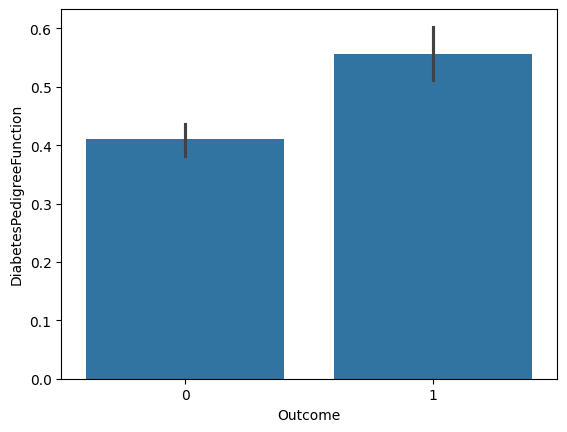

In [ ]:
sns.barplot(data=df,x="Outcome",y="DiabetesPedigreeFunction")
# The genetic factor affects the likelihood of developing diabetes, but the difference is not significant — only around 0.2.

<Axes: xlabel='Outcome', ylabel='Glucose'>

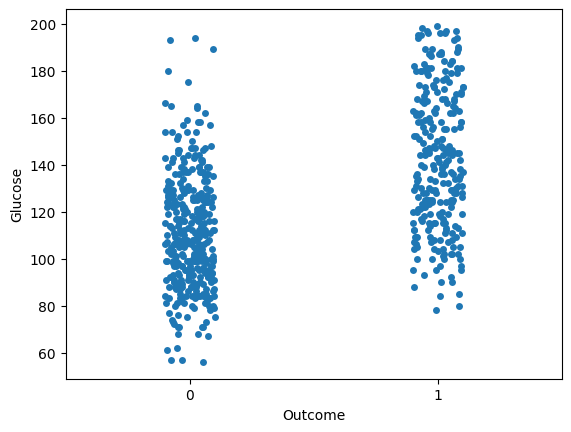

In [ ]:
sns.stripplot(data=df,x="Outcome",y="Glucose")
# Those who had diabetes had higher glucose levels.

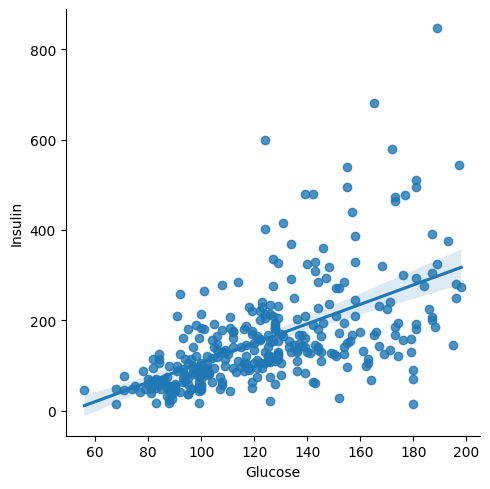

In [ ]:
sns.lmplot(data=df,x="Glucose",y="Insulin")
# There is a positive correlation between glucose and insulin.

<Axes: xlabel='Outcome', ylabel='Insulin'>

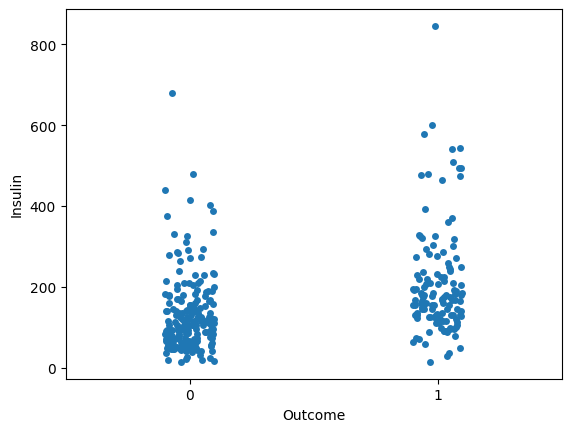

In [ ]:
sns.stripplot(data=df,x="Outcome",y="Insulin")
# Although there is a positive correlation between glucose and insulin, there is no clear relationship between insulin and diabetes.

In [ ]:
df["Outcome"].value_counts(normalize=True)
# imbalance class

,proportion
Outcome,
0,0.580595
1,0.419405


#Preprocessing

In [ ]:
# Define features and target
y = df["Outcome"]
x = df.drop(columns=["Outcome"])
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
# creat pipeline for num cols
num_cols=x_train.select_dtypes('number').columns
num_imputer=SimpleImputer(strategy="mean")
#  ichoose to impute missing values using the mean because it is appropriate for numerical features that are approximately normally distributed.
#  It maintains the overall central tendency of the data and minimizes distortion in the distribution.
num_scaler=StandardScaler()
num_pipe=make_pipeline(num_imputer,num_scaler)
num_tuple=("numerical",num_pipe,num_cols)

In [ ]:
# creat pipeline for cat cols
# there id no null value in Gender so I will not use imputer
cat_cols=["Gender"]
encoder=OneHotEncoder(handle_unknown="ignore",sparse_output=False)
# Because there is no order in the Gender column, and Male cannot be considered greater than Female , I used one-hot encoding.
cat_tuple=("categorical",encoder,cat_cols)

In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,4
BloodPressure,26
SkinThickness,185
Insulin,309
DiabetesPedigreeFunction,29
WeightGroup,0
AgeGroup,0
Gender,0
Outcome,0


In [ ]:
# creat pipeline for ordinal cols
ord_cols=["AgeGroup","WeightGroup"]
age_group=["18 - 44","45 - 64",">65"]
weight_group=["MISSING","underweight","healthy weight","overweight","obese_1","obese_2","obsese_3"]
order=[age_group,weight_group]
ord_encoder=OrdinalEncoder(categories=order)
ord_scaler=StandardScaler()
ord_pipe=make_pipeline(ord_encoder,ord_scaler)
ord_cat=("ordinal",ord_pipe,ord_cols)
# The data is ordered, and assigning a value like 0 to the age group "18-44" reflects that it is less than the age group "45-65". Therefore,
#  since there is a natural order, I used ordinal encoding.

In [ ]:
preprocessor=ColumnTransformer([num_tuple,cat_tuple,ord_cat],verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Gender']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['18 '
                                                                              '- '
                                                                              '44',
                                                                              '45 '
                                                                              '- '
                                                                              '64',
                                                                              '>65'],
                                                                             ['MISSING',
                                                                              'underweight',
                                                                              'healthy '
                                                                              'weight',
                                                                              'overweight',
                                                                              'obese_1',
                                                                              'obese_2',
                                                                              'obsese_3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['AgeGroup', 'WeightGroup'])],
                  verbose_feature_names_out=False)

###Modeling (we had a classification task)

In [ ]:
# baseline Model(knn)
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
model_pipeline=make_pipeline(preprocessor,knn_model)
model_pipeline.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_ou...
                                                  ['Gender']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '44',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '64',
                                                                                               '>65'],
                                                                                              ['MISSING',
                                                                                               'underweight',
                                                                                               'healthy '
                                                                                               'weight',
                                                                                               'overweight',
                                                                                               'obese_1',
                                                                                               'obese_2',
                                                                                               'obsese_3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AgeGroup', 'WeightGroup'])],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       260
           1       0.79      0.81      0.80       219

    accuracy                           0.81       479
   macro avg       0.81      0.81      0.81       479
weighted avg       0.81      0.81      0.81       479



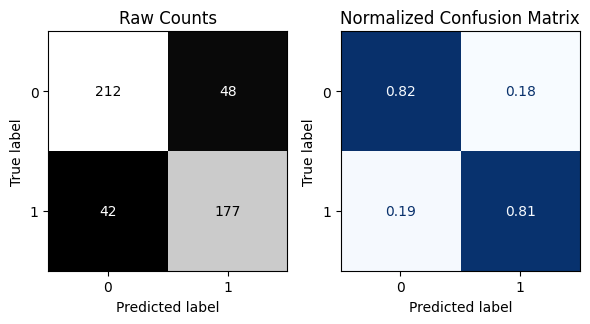


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.65      0.72       111
           1       0.46      0.67      0.55        49

    accuracy                           0.66       160
   macro avg       0.64      0.66      0.63       160
weighted avg       0.71      0.66      0.67       160



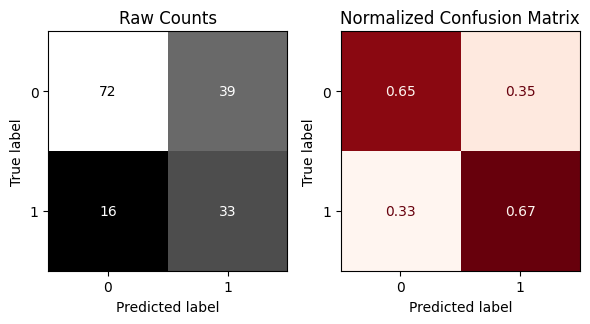

In [ ]:
evaluate_classification(model_pipeline,x_train, y_train, x_test, y_test )

as we work with knn model we will tune the k hyperparameter

In [ ]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
          'DiabetesPedigreeFunction'],
         dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Gender']),
                                   ('ordinal',
                                    Pipeline(steps=[('ordinalencoder',
                                                     OrdinalEncoder(ca

In [ ]:

params={'kneighborsclassifier__n_neighbors':range(3,35)}
grid=GridSearchCV(model_pipeline,params,n_jobs=-1,verbose=1,cv=3,scoring="recall")
grid.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(handl...
                                                                                                                      '64',
                                                                                                                      '>65'],
                                                                                                                     ['MISSING',
                                                                                                                      'underweight',
                                                                                                                      'healthy '
                                                                                                                      'weight',
                                                                                                                      'overweight',
                                                                                                                      'obese_1',
                                                                                                                      'obese_2',
                                                                                                                      'obsese_3']])),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['AgeGroup',
                                                                          'WeightGroup'])],
                                                          verbose_feature_names_out=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(3, 35)},
             scoring='recall', verbose=1)

In [ ]:
grid.best_params_

{'kneighborsclassifier__n_neighbors': 7}

In [ ]:
best_model=grid.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       260
           1       0.78      0.80      0.79       219

    accuracy                           0.81       479
   macro avg       0.81      0.81      0.81       479
weighted avg       0.81      0.81      0.81       479



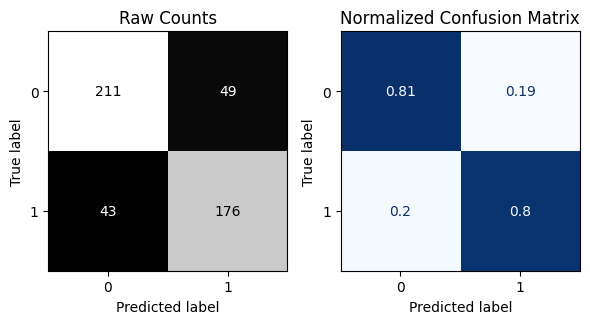


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       111
           1       0.50      0.69      0.58        49

    accuracy                           0.69       160
   macro avg       0.67      0.69      0.67       160
weighted avg       0.73      0.69      0.70       160



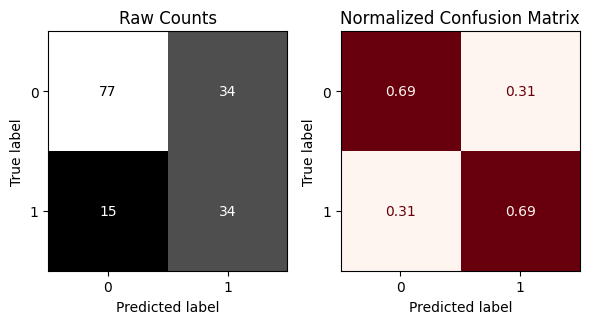

In [ ]:
evaluate_classification(best_model,x_train,y_train,x_test,y_test )

BaseLine model (logisticRegression)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       260
           1       0.74      0.70      0.72       219

    accuracy                           0.75       479
   macro avg       0.75      0.75      0.75       479
weighted avg       0.75      0.75      0.75       479



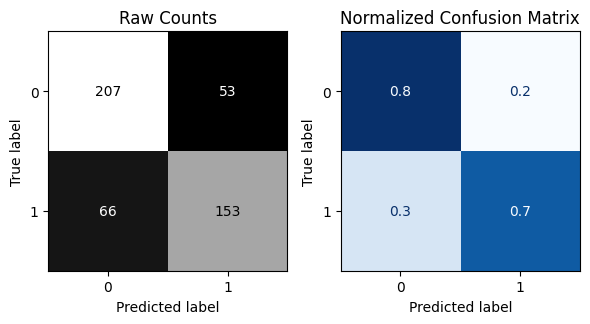


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       111
           1       0.57      0.63      0.60        49

    accuracy                           0.74       160
   macro avg       0.70      0.71      0.71       160
weighted avg       0.75      0.74      0.75       160



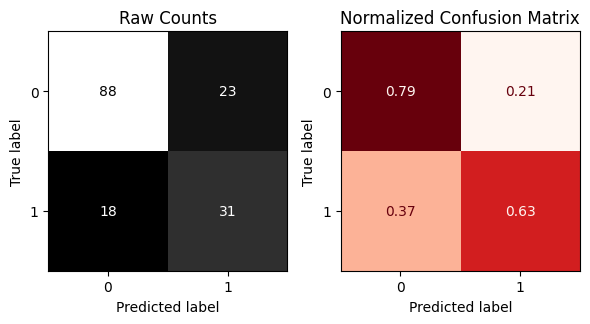

In [ ]:
from sklearn.linear_model import LogisticRegression
leg_model=LogisticRegression()
leg_pipe=make_pipeline(preprocessor,leg_model)
leg_pipe.fit(x_train,y_train)
evaluate_classification(leg_pipe,x_train,y_train,x_test,y_test )

Tuning the hyperparmeter

In [ ]:
# i am gonne to give the Gridsearch all the possible penalty and c value


l2_params = {'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                            'newton-cholesky', 'sag', 'saga'],
                  'logisticregression__penalty' : ['l2'],
                  'logisticregression__C': [0.0001, 0.001, 0.01, 0.1,
                                            1, 10, 100, 1000] }
elasticnet_params = {'logisticregression__solver' : ['saga'],
               'logisticregression__penalty' : ['elasticnet'],
                'logisticregression__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4,
                                                 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
# Params compatible with penality='l2'

# Params compatible with penality='l1'
l1_params = {'logisticregression__solver' : ['liblinear', 'saga'],
               'logisticregression__penalty' : ['l1'],
                'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100, 1000]}
params=[elasticnet_params,l2_params,l1_params]

In [ ]:
gride=GridSearchCV(leg_pipe,params,n_jobs=-1,verbose=1,cv=3,scoring="recall_macro")
gride.fit(x_train,y_train);

Fitting 3 folds for each of 75 candidates, totalling 225 fits


In [ ]:
gride.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

In [ ]:
best_model1=gride.best_estimator_
best_model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction'],
      dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_ou...
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['18 '
                                                                                               '- '
                                                                                               '44',
                                                                                               '45 '
                                                                                               '- '
                                                                                               '64',
                                                                                               '>65'],
                                                                                              ['MISSING',
                                                                                               'underweight',
                                                                                               'healthy '
                                                                                               'weight',
                                                                                               'overweight',
                                                                                               'obese_1',
                                                                                               'obese_2',
                                                                                               'obsese_3']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['AgeGroup', 'WeightGroup'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       260
           1       0.75      0.72      0.74       219

    accuracy                           0.76       479
   macro avg       0.76      0.76      0.76       479
weighted avg       0.76      0.76      0.76       479



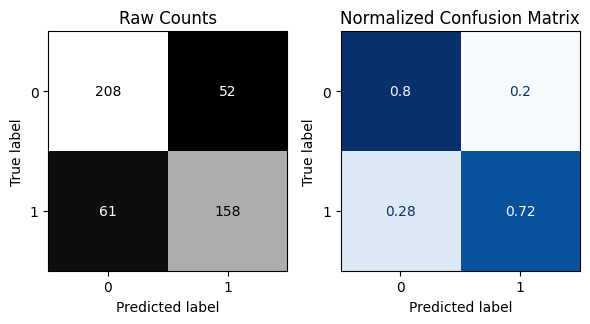


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       111
           1       0.57      0.67      0.62        49

    accuracy                           0.74       160
   macro avg       0.71      0.72      0.71       160
weighted avg       0.76      0.74      0.75       160



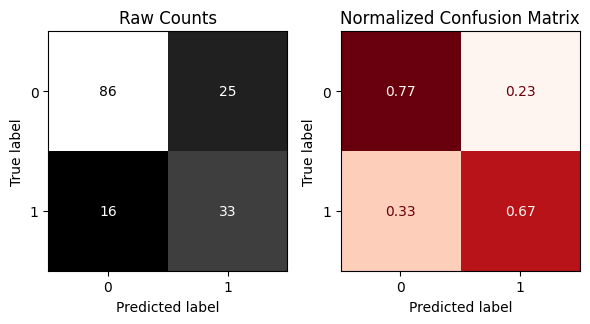

In [ ]:
evaluate_classification(best_model1,x_train,y_train,x_test,y_test )

I chose Logistic Regression because the model was able to correctly identify 69% of the patients who actually had diabetes (recall), while the KNN model only identified 65% of them.

In terms of overall accuracy, Logistic Regression achieved 74%, whereas KNN reached only 64%, which is a difference of 10% in favor of Logistic Regression.

Since this is a medical prediction task, where both accuracy and the ability to detect actual cases are critical, Logistic Regression performed better and is more reliable. Therefore, I decided to choose it.